In [ ]:
using StockFlow
using StockFlow.Syntax

# 1. Define SEIR Stock and Flow model

In [ ]:
seir = @stock_and_flow begin
    :stocks
    S
    E
    I
    R

    :parameters
    μ
    β
    tlatent
    trecovery
    δ

    :dynamic_variables
    v_birth = μ * N
    v_incid₁ = I / N
    v_incid₂ = S * v_incid₁
    v_incid₃ = β *  v_incid₂
    v_inf = E / tlatent
    v_rec = I / trecovery
    v_deathS = S * δ
    v_deathE = E * δ 
    v_deathI = I * δ
    v_deathR = R * δ

    :flows
    CLOUD => f_birth(v_birth) => S
    S => f_incid(v_incid₃) => E
    S => v_deathS(v_deathS) => CLOUD
    E => f_inf(v_inf) => I
    E => f_deathE(v_deathE) => CLOUD
    I => f_rec(v_rec) => R
    I => f_deathI(v_deathI) => CLOUD
    R => f_deathR(v_deathR) => CLOUD

    :sums
    N = [S,E,I,R]

end

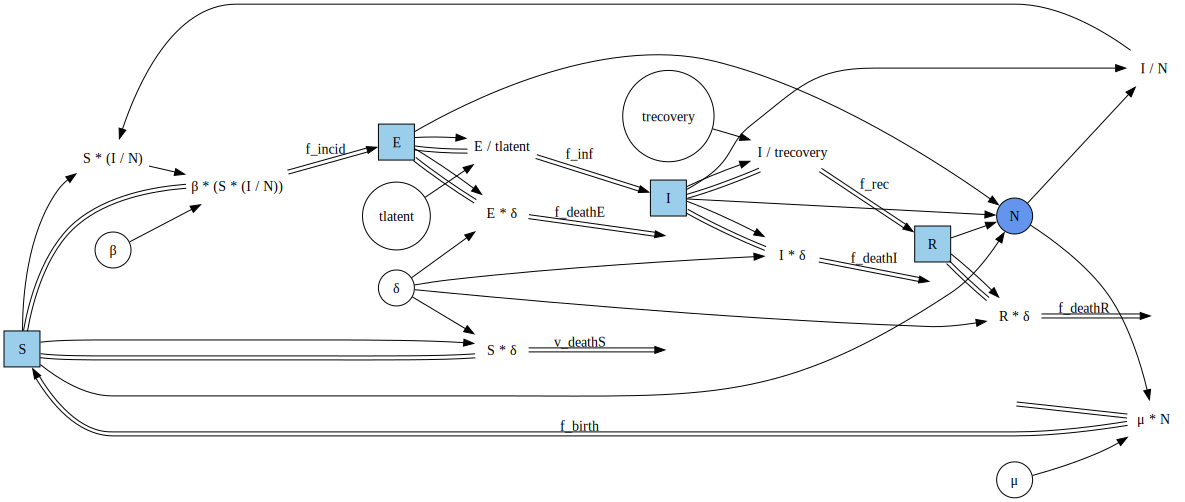

In [6]:
GraphF(seir)

# 2. Convert the Stock and Flow diagram to Causal Loop diagram

In [ ]:
seir_causalLoop = convertToCausalLoop(seir)

In [ ]:
Graph(seir_causalLoop)